### Линейные решающие функции

Рассмотрим алгоритм построения линейных решающих функций. Линейная функция имеет следующий вид:

$$D(x) = \left (w_{0}+\sum^{n}_{j=1}w_{j}x_{j} \right).$$

Цель алгоритма – найти коэффициенты   решающей функции   методом последовательного уточнения.

Основой для вычисления коэффициентов   является анализ обучающей выборки  , где известна заранее принадлежность объектов  классу 1 или классу 2. Далее эти два класса обозначим С1 и С2. 

Решающая функция считается построенной, если все объекты обучающей выборки распознаются этой функцией правильно, то есть $D(x)>0 , если X ∈ C_1$, и , соответственно,  $D(x)<0, если X ∈ C_2$. 

### Коррекция коэффициентов решающей функции выполняется по следующему правилу:

+ коэффициенты решающей функции увеличиваются при неправильном распознавании объекта из класса С1

+ уменьшаются при неправильном распознавании объекта из класса С2

+ остаются без изменения, если распознавание идет правильно.

### Счетчит правильного распознавания:

Если на некотором шаге произойдет корректировка коэффициентов решающей функции, счетчик правильно распознанных объектов, обозначаемый далее как $"сч"$, сбрасывается в ноль, поскольку мы перешли к новой функции и теперь ее надо проверить на всех элементах обучающей выборки.


### Завершение алгоритма:

Алгоритм завершается, когда окажется, что построенная решающая функция D(Х) правильно распознает все объекты обучающего множества.

### Алгоритм:

Импортирование библиотек:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

1. Получить обучающую выборку  , элементы которой принадлежат непересекающимся классам С1 или С2. (Вариант 1)

In [2]:
C1 = np.array([[1, 1, 2],
     [1, 2, 5],
     [1, 3, 5]])

C2 = np.array([[1, 7, 4],
     [1, 5, 3],
     [1, 6, 4]])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1]) #Добавил обозначения классов, 1 - С1, -1 - С2.
#Добавил фиктивный признак единиу, для вычисления веса w0
C

array([[1, 1, 2],
       [1, 2, 5],
       [1, 3, 5],
       [1, 7, 4],
       [1, 5, 3],
       [1, 6, 4]])

Визуализация

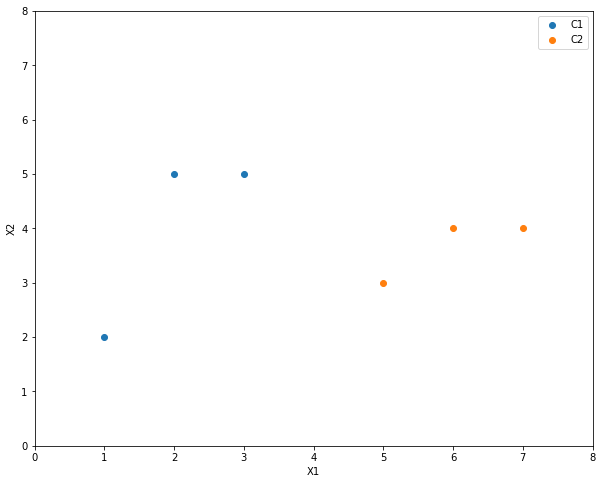

In [3]:
# и изобразим их на графике
plt.figure(figsize=(10, 8))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
plt.legend(['C1', 'C2']);

2. Установить в ноль счетчик правильно распознанных объектов: i=0.

In [4]:
i = 0

3. Установить номер итерации равным нулю: ch=0.

In [5]:
ch = 0

4. Задать начальные значения коэффициентов $w_j$ в решающей функции (например,  $w_j = 0$, для $j = 0,1, ..., n$ ). Получим решающую функцию   $D_0(x)$. 

In [6]:
def func(x1, x2, w):
    return w[0] + w[1]*x1 + w[2]*x2

In [7]:
w = np.array([[0,0,0]])
w

array([[0, 0, 0]])

5. Выбираем класс С1 в качестве текущего класса. 

6. Переход к новой итерации: ch=ch+1.

In [8]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) #Массив весов

In [9]:
def weight_func(w, c, x):
    
    next_weight = np.array([0,0,0])
    pred_weight = w.shape[0]-1 # номер строки предыдущих весов
    for i in range(3):
        next_weight[i] = w[pred_weight, i] + c*x[i]
        
    return np.vstack([w, next_weight]) # добавляем новую строку с новыми весами

7. Выбрать очередной объект  текущего класса (класса С1). Если класс С1 исчерпан, объявить текущим классом класс С2 , выбрать очередной объект этого класса.
8. Вычислить новые значения коэффициентов решающей функции на итерации к:
$w_j^k = w_j^{k-1} + c*x_{ij}$ , где с – множитель, определяемый из условия:
+ Если D(x) <= 0, при x ∈ С1, то с = 1
+ Если D(x) > 0, при x ∈ С2, то с = -1
+ Если классы распознаны верно, то с = 0

9. Если с ≠ 0,  сч=0 и перейти к шагу 6.

10. Если с=0, сч=сч+1 (увеличиваем на 1 число правильно распознанных объектов), 
	Проверить:  Если сч=М – общему числу объектов обучающей выборки  , то КОНЕЦ, иначе перейти к шагу 7.

In [61]:
def create_line(С, Y, w, ch):
    n = C.shape[0] #Кол. данных
    i = 0
    k = w.shape[0] - 1
    print(f'iter{0}, weight{w[0, :]}')
    while i < n:
        if Y[i] == 1: #Если класс первый, то:
            cl = func(C[i, 1], C[i, 2], w[k, :])#вычисляем значение функции
            if cl <= 0:
                w = weight_func(w, 1, C[i, :])#новые веса
                k = w.shape[0] - 1 #индекс последнего набора весов
                i = -1 # начинает заново нашу проверку
                print(f'iter{ch}, weight{w[k, :]}')
                ch += 1 #увеличиваем счетчик итераций
                
        else: #Если класс второй, то:
            
            cl = func(C[i, 1], C[i, 2], w[k, :]) #вычисляем значение функции
            if cl > 0: 
                w = weight_func(w, -1, C[i, :]) #новые веса
                k = w.shape[0] - 1 #индекс последнего набора весов
                i =  -1# начинает заново нашу проверку
                print(f'iter{ch}, weight{w[k, :]}')
                ch += 1 #увеличиваем счетчик итераций
        i += 1
    return w, ch

In [11]:
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 1 2]
iter2, weight[ 0 -6 -2]
iter3, weight[ 1 -5  0]
iter4, weight[ 2 -4  2]
iter5, weight[ 3 -1  7]
iter6, weight[ 2 -8  3]
iter7, weight[ 3 -7  5]


Исходная функция выглядит след. образом D(x) = 3-7*x1+5*x2
преобразуем в вид: y = ax+b

    x2 = (-3 + 7*x1)/5

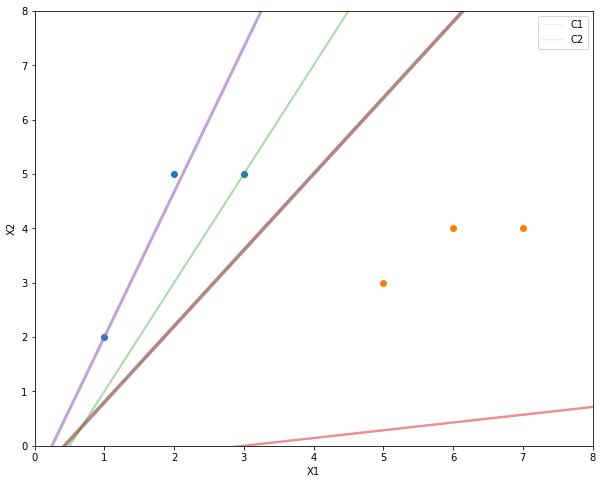

In [12]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

## Проверим все 8 вариантов

1) Первый вариант сошелся с автором


### Второй вариант

In [13]:
C1 = np.array([[1, 1, 5],
     [1, 2, 5],
     [1, 2, 4]])

C2 = np.array([[1, 6, 2],
     [1, 7, 3],
     [1, 8, 4]])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [14]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 1 5]
iter2, weight[ 0 -5  3]


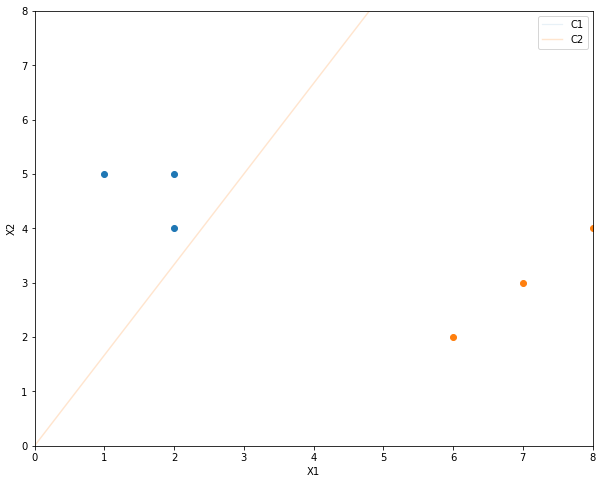

In [15]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод: Второй вариант тоже сошелся, 
+ Количество итераций: 3
+ веса: 0, -5, 3. 

### 3 Вариант

In [16]:
C1 = np.array([[1, 2, 5],
     [1, 2, 6],
     [1, 1, 4]])

C2 = np.array([  [1, 4, 1],
     [1, 5, 1],
     [1, 4, 2],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [17]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 2 5]
iter2, weight[ 0 -2  4]


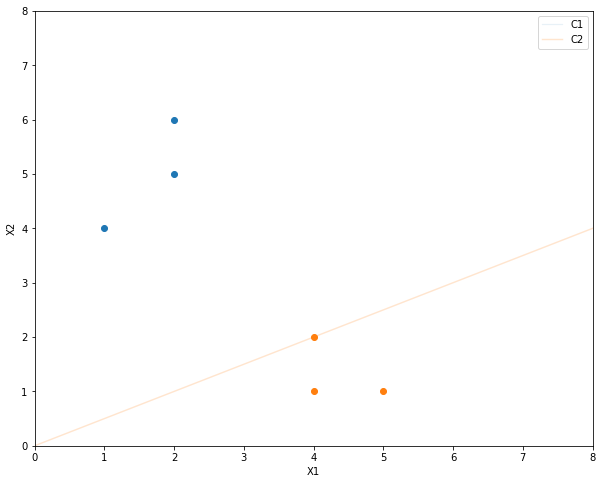

In [18]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 3
+ веса: 0, -2, 4. 

### 4 Вариант

In [19]:
C1 = np.array([[1, 6, 2],
     [1, 5, 1],
     [1, 8, 2]])

C2 = np.array([  [1, 2, 4],
     [1, 2, 2],
     [1, 3, 2],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [20]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 6 2]
iter2, weight[ 0  4 -2]
iter3, weight[-1  2 -4]


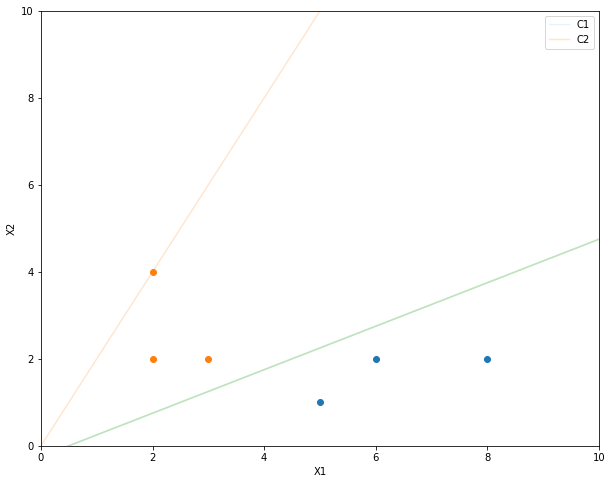

In [21]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 4
+ веса: -1, 2, -4. 

### 5 Вариант

In [22]:
C1 = np.array([[1, 5, 2],
     [1, 6, 1],
     [1, 3, 1]])

C2 = np.array([  [1, 1, 5],
     [1, 2, 5],
     [1, 3, 6],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [23]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 5 2]
iter2, weight[ 0  4 -3]


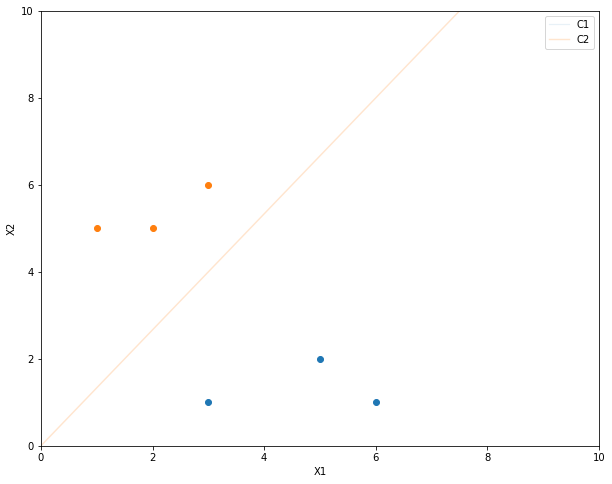

In [24]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 3
+ веса: 0, 4, -3. 

### 6 Вариант

In [25]:
C1 = np.array([[1, 1, 1],
     [1, 1, 2],
     [1, 5, 7]])

C2 = np.array([  [1, 6, 4],
     [1, 6, 5],
     [1, 5, 1],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [26]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 1 1]
iter2, weight[ 0 -5 -3]
iter3, weight[ 1 -4 -2]
iter4, weight[ 2 -3 -1]
iter5, weight[ 3 -2  0]
iter6, weight[4 3 7]
iter7, weight[ 3 -3  3]


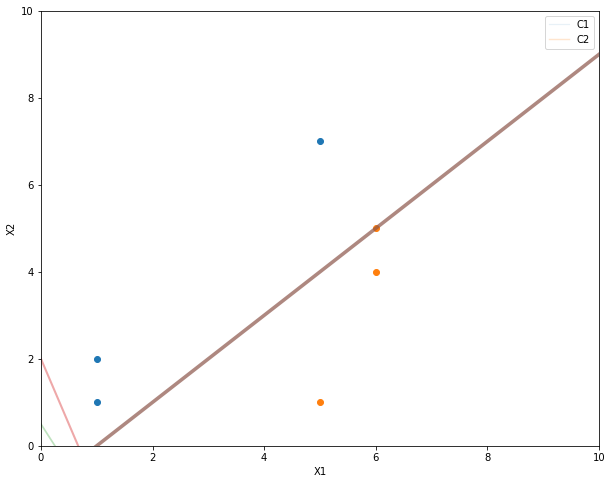

In [27]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 8
+ веса: 3, -3, 3. 

### 7 Вариант

In [28]:
C1 = np.array([[1, 5, 2],
     [1, 6, 2],
     [1, 4, 1]])

C2 = np.array([  [1, 1, 2],
     [1, 1, 3],
     [1, 3, 3],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [29]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 5 2]
iter2, weight[0 4 0]
iter3, weight[-1  3 -2]
iter4, weight[-2  0 -5]
iter5, weight[-1  5 -3]
iter6, weight[-2  2 -6]
iter7, weight[-1  7 -4]
iter8, weight[-2  4 -7]


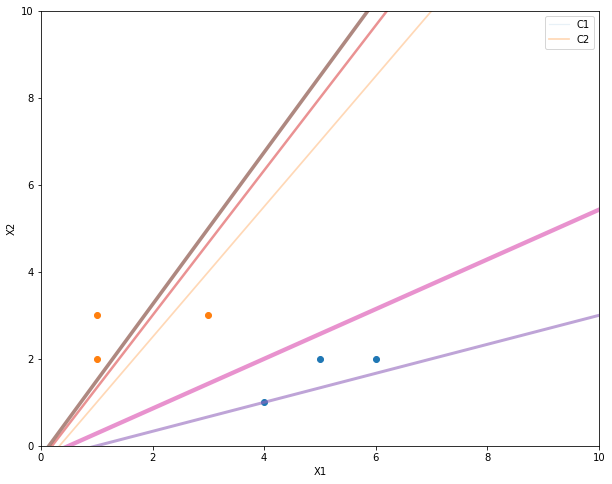

In [30]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 9
+ веса: -2, 4, -7. 

### 8 Вариант

In [31]:
C1 = np.array([[1, 3, 3],
     [1, 1, 4],
     [1, 1, 3]])

C2 = np.array([  [1, 5, 1],
     [1, 4, 1],
     [1, 6, 3],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [32]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 3 3]
iter2, weight[ 0 -2  2]
iter3, weight[1 1 5]
iter4, weight[ 0 -4  4]
iter5, weight[ 1 -1  7]
iter6, weight[ 0 -6  6]
iter7, weight[ 1 -3  9]
iter8, weight[ 0 -9  6]
iter9, weight[ 1 -6  9]


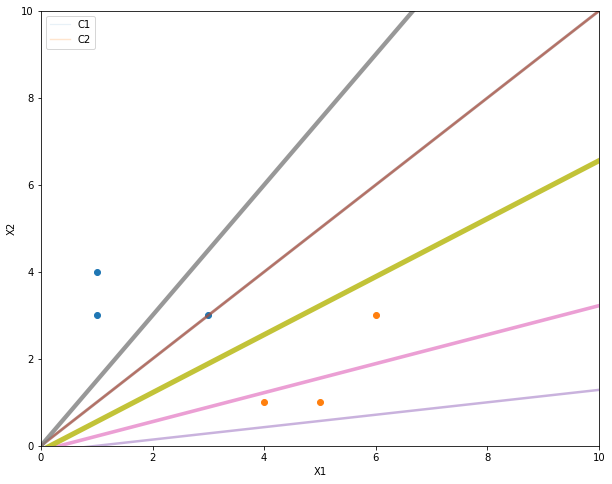

In [33]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 10
+ веса: 1, -6, 9. 

### 9 Вариант

In [34]:
C1 = np.array([[1, 1, 2],
     [1, 2, 3],
     [1, 3, 3]])

C2 = np.array([  [1, 6, 1],
     [1, 7, 2],
     [1, 9, 1],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])

In [35]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 1 2]
iter2, weight[ 0 -5  1]
iter3, weight[ 1 -4  3]
iter4, weight[ 2 -1  6]
iter5, weight[ 1 -7  5]
iter6, weight[ 2 -4  8]


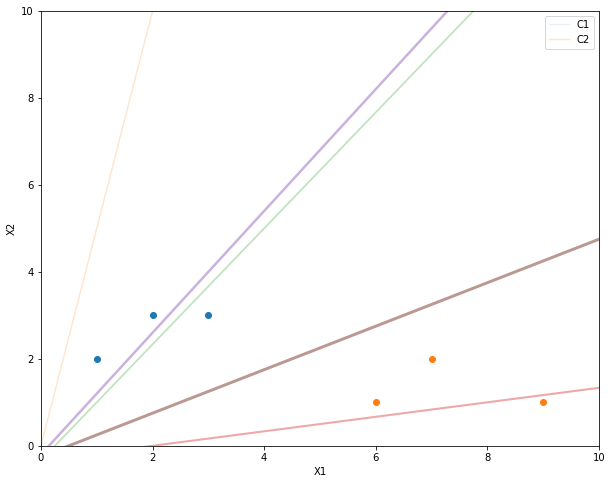

In [36]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

Вывод:  
+ Количество итераций: 7
+ веса: 2, -4, 8. 

### Что делать, если число итераций больше 5 -6?

### Тут логичнее всего увеличить шаг, для того, чтобы прямая сходилась быстрее.(Не работает, проверил)

### Поменяем классы С1 и С2 местами, в качестве примера возьмем 8 вариант, в котором у нас было 10 итераций

In [62]:
C2 = np.array([[1, 3, 3],
     [1, 1, 4],
     [1, 1, 3]])

C1 = np.array([  [1, 5, 1],
     [1, 4, 1],
     [1, 6, 3],])
C = np.vstack([C1, C2])
Y = np.array([1, 1, 1, -1, -1, -1])
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 5 1]
iter2, weight[ 0  2 -2]


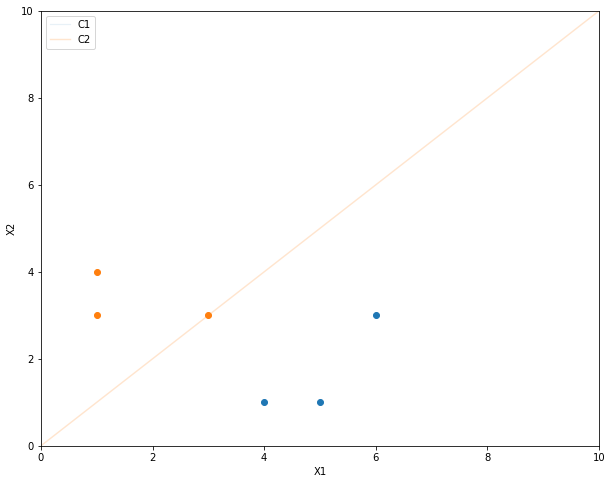

In [63]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

## Вывод: 
### Поменяв классы С1 и С2, нам удалось с 10 итераций сократить до 3-х итерация

## Рассмотрим вариант 9-й вариант, в нем 7 итераций, попробуем в качестве начальной точки поставить конечную, а не первую

In [64]:
C1 = np.array([[1, 9, 1],
     [1, 2, 3],
     [1, 3, 3]])

C2 = np.array([  [1, 6, 1],
     [1, 7, 2],
     [1, 1, 2]])
C = np.vstack([C1, C2])
Y = np.array([-1, 1, 1, -1, -1, 1])

In [65]:
ch = 0
ch += 1
w = np.array([[0,0,0]]) 
w, ch = create_line(C, Y, w, ch)

iter0, weight[0 0 0]
iter1, weight[1 2 3]
iter2, weight[ 0 -7  2]
iter3, weight[ 1 -5  5]


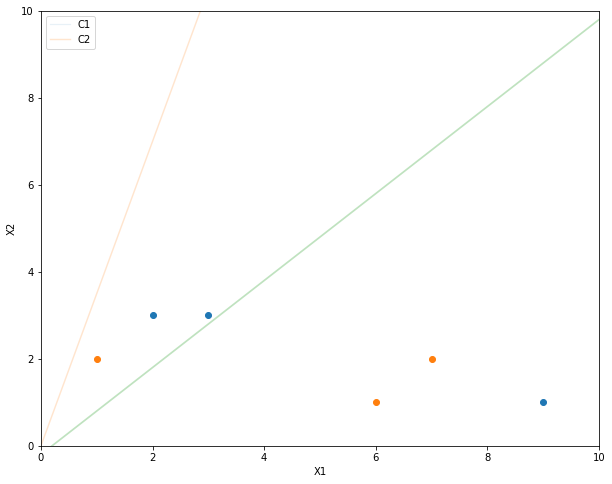

In [66]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(C1[:,1], C1[:,2], cmap='red');
plt.scatter(C2[:,1], C2[:,2], cmap='blue');
dots = np.linspace(0, 10, 10)
for i in range(1, w.shape[0]):
    if w[i, 2] != 0:
        line_value = list([(-w[i, 1]*x-w[i, 0])/w[i, 2] for x in dots])
        plt.plot(dots, line_value, alpha = i/10, lw = 1.2**i)
        
plt.legend(['C1', 'C2']);

## Вывод: 
### Поменяв 1-ю и последнюю точку местами, удалось сократить кол. итераций с 7 до 4.
### На рисунке немного цвета классов съехали